<a href="https://colab.research.google.com/github/ashu-tosh272/customer-behaviour/blob/main/Customer_Behaviour_Analysis_through_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/marketing_campaign.csv', sep = '\t')
print('The number of datapoints : ', len(data))

The number of datapoints :  2240


In [ ]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### By looking at the metrics we can conclude that
- Income has missing values
- Dt_Customer column is not parsed.
- Education and Marital_Status are categorical columns.

### Data Cleaning

- Remove Null values
- parse Dt_Customer to Datetime object
- Convert Categorical Data to Numerical Data

In [ ]:
data = data.dropna()
print('Missing values : ', 2240 - len(data) )
print('Datapoints after removing missing values : ', len(data))

Missing values :  24
Datapoints after removing missing values :  2216


In [ ]:
data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [ ]:
categorical_columns = [x for x in data.columns if data.dtypes[x] == 'object']

In [ ]:
categorical_columns

['Education', 'Marital_Status']

In [ ]:
print('Total number of values in Education : \n', data['Education'].value_counts(), '\n')

Total number of values in Education : 
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 



In [ ]:
print('Total number of values in Marital_Status : \n', data['Marital_Status'].value_counts(), '\n')

Total number of values in Marital_Status : 
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



### Feature Engineering
- Create feature "Age" to find the age of the customers.
- Create feature "Spent" to find the amount spent by people over the period.
- Create feature "Living" to categorize people based on their "Marital_Status".
- Simplify feature "Education" into 2 Categories only.
- Create feature "Children" to calculate total number of children in a family.
- Drop irrelevent features

In [ ]:
data['Age'] = 2021 - data['Year_Birth']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
spent_columns = ['MntWines',
                 'MntFruits',
                 'MntMeatProducts',
                 'MntFishProducts',
                 'MntSweetProducts',
                 'MntGoldProds']
data['Spent'] = data['MntWines']
+ data['MntFruits']
+ data['MntMeatProducts']
+ data['MntSweetProducts']
+ data['MntFishProducts']
+ data['MntGoldProds']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0        88
1         6
2        42
3         5
4        15
       ... 
2235    247
2236      8
2237     24
2238     61
2239     21
Name: MntGoldProds, Length: 2216, dtype: int64

In [ ]:
data["Living"] = data['Marital_Status'].replace(
{
    'Married': 'Partner',
'Together': 'Partner',
'Single' : 'Alone',
'Absurd': 'Alone',
'Widow': 'Alone',
'Divorced' : 'Alone',
'Alone': 'Alone',
'YOLO': 'Alone',
}
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data['Family_of'] = data['Living'].replace({
    'Alone' : 1,
    'Partner' : 2
}) + data['Children']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data['Education'] = data['Education'].replace({
    'Basic' : 'UG',
    '2n cycle' : 'UG',
    'Graduation' : 'UG',
    'Master' : 'PG',
    'PhD' : 'PG',
})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data = data.rename(columns={
    'MntWines' : 'Wines',
                 'MntFruits': 'Fruits' ,
                 'MntMeatProducts': 'Meat',
                 'MntFishProducts' : 'Fish',
                 'MntSweetProducts' : 'Sweet',
                 'MntGoldProds' : 'Gold',
})

In [ ]:
drop_columns =['ID', 'Year_Birth', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
data = data.drop(drop_columns, axis = 1)

In [ ]:
data['Is_parent'] = np.where(data.Children > 0, 1, 0)

<Figure size 432x288 with 0 Axes>

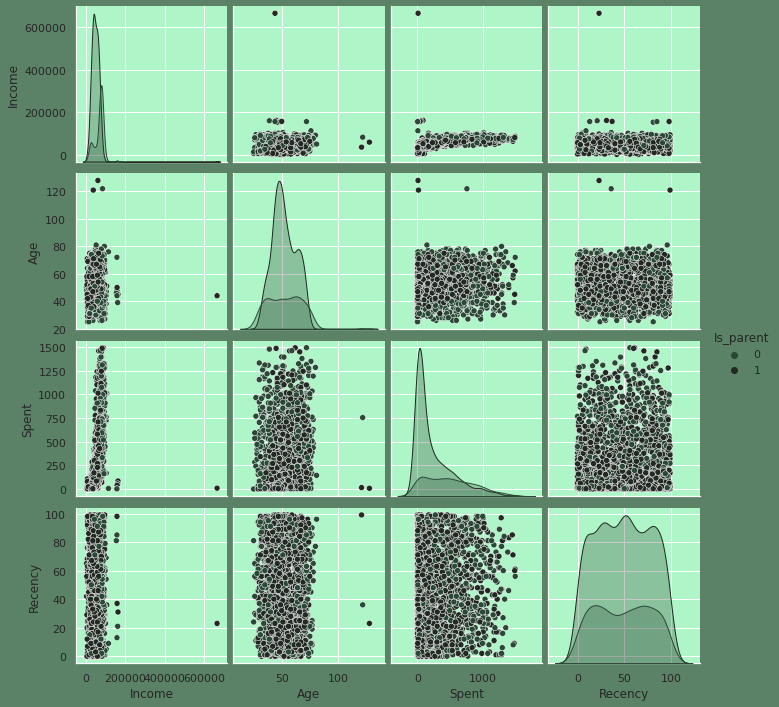

In [ ]:
palette = ['#212922', "#294936", '#3E6259', '#5B8266', '#AEF6C7']

plot_columns = ['Income', 'Age', 'Spent', 'Recency', 'Is_parent']

sns.set(rc={"axes.facecolor":"#AEF6C7","figure.facecolor":"#5B8266"})

plt.figure(figsize=(8, 10))
sns.pairplot(data[plot_columns], hue = 'Is_parent',palette = (["#294936","#212922"]))
plt.show()

There are some outliers in our data
- Age column < 100
- Income column < 600000

In [ ]:
data= data[(data['Age'] < 100)]
data = data[(data['Income'] < 600000)]

#### Correlation between the features

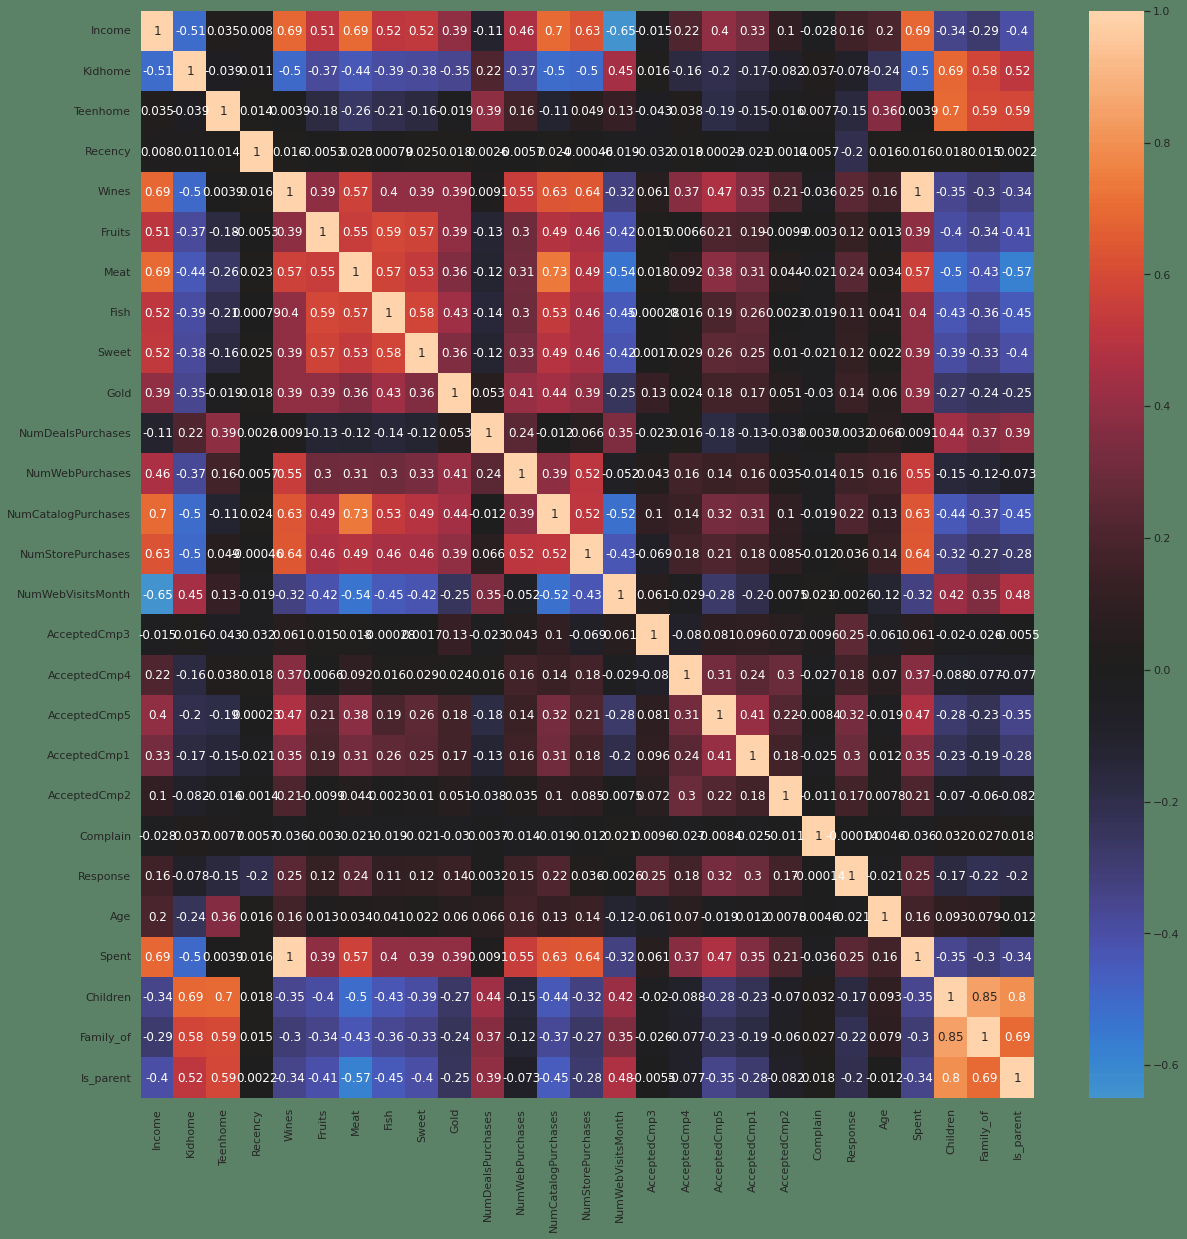

In [ ]:
matrix = data.corr()
plt.figure(figsize=(8, 15))
sns.heatmap(matrix, annot = True, center = 0)

### Data Preprocessing
<b> In this section we will be preprocessing our data in the following ways :</b>

    - Label encoding the categorical columns
    - Scaling the features using Standard Scaler
    - Create a subset dataframe for dimensionality reduction

In [ ]:
#Encoding

categorical_columns = [x for x in data.columns if data.dtypes[x] == 'object']
print(categorical_columns)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_columns:
    data[i] = data[[i]].apply(le.fit_transform)
print('All categorical columns encoded to numerical.')

['Education', 'Living']
All categorical columns encoded to numerical.


In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
delete_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = data.copy()
df=df.drop(delete_columns, axis = 1)
std_scaler = StandardScaler()
std_scaler.fit(df)

scaled_df = pd.DataFrame(std_scaler.transform(df), columns = df.columns )
print('All features are now scaled')

All features are now scaled


In [ ]:
#Lets look at our scaled data
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living,Children,Family_of,Is_parent
0,0.860280,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.426865,2.503607,-0.555814,0.692181,1.018352,0.977660,-1.349603,-1.264598,-1.758359,-1.581139
1,0.860280,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.872618,-1.349603,1.404572,0.449070,0.632456
2,0.860280,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.357935,0.740959,-1.264598,-0.654644,-1.581139
3,0.860280,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.872618,0.740959,0.069987,0.449070,0.632456
4,-0.673112,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.392257,0.740959,0.069987,0.449070,0.632456


### Principal Component Analysis
- Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
- Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df), columns = (['D1', 'D2', 'D3']))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
D1,2212.0,1.467582e-16,2.824689,-5.947441,-2.533166,-0.730388,2.384084,7.206940
D2,2212.0,-3.342715e-17,1.721774,-4.154975,-1.367756,-0.149531,1.245377,6.392662
D3,2212.0,4.502125e-17,1.165023,-3.644806,-0.837436,-0.140449,0.816249,4.123551


In [ ]:
pca_df.head()

,D1,D2,D3
0,4.705413,-0.595382,0.908872
1,-2.826009,0.111860,0.416348
2,2.663853,-0.735610,-0.122624
3,-2.632605,-1.423288,-0.932269
4,-0.642449,0.261482,-1.158220


#### Plotting the reduced dimension

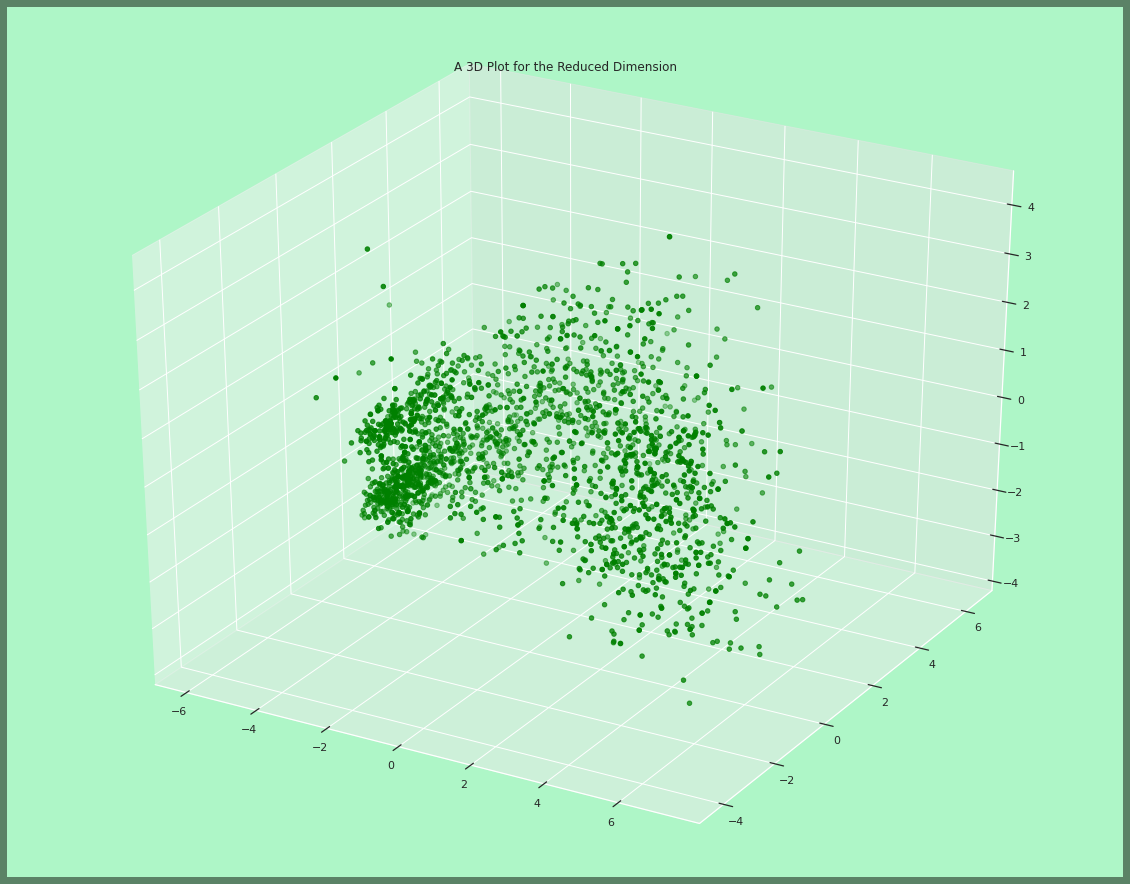

In [ ]:
x = pca_df['D1']
y = pca_df['D2']
z = pca_df['D3']

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c= 'green', marker = 'o' )
ax.set_title('A 3D Plot for the Reduced Dimension')
plt.show()

### Clustering
Now since we have reduced the attributes to three dimensions, I will be performing a clustering algorithm.
<br>
<b>We will be doing the following things :</b>
- Elbow Method to find out the number of clusters
- Clustering through Agglomerative Clustering
- Visualizing the clusters

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import metrics

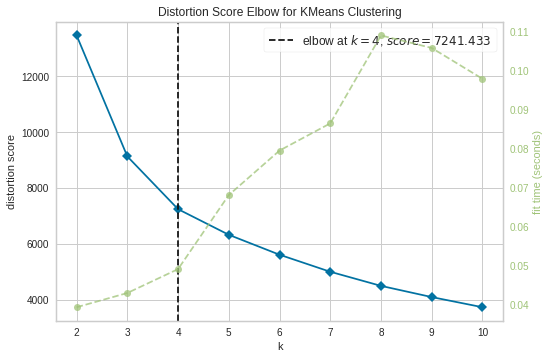

In [ ]:
elbow = KElbowVisualizer(KMeans(), k = 10)
elbow.fit(pca_df)
elbow.show()

In [ ]:
##Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 4)
y_ac = ac.fit_predict(pca_df)
pca_df['Clusters'] = y_ac
data['Clusters'] = y_ac

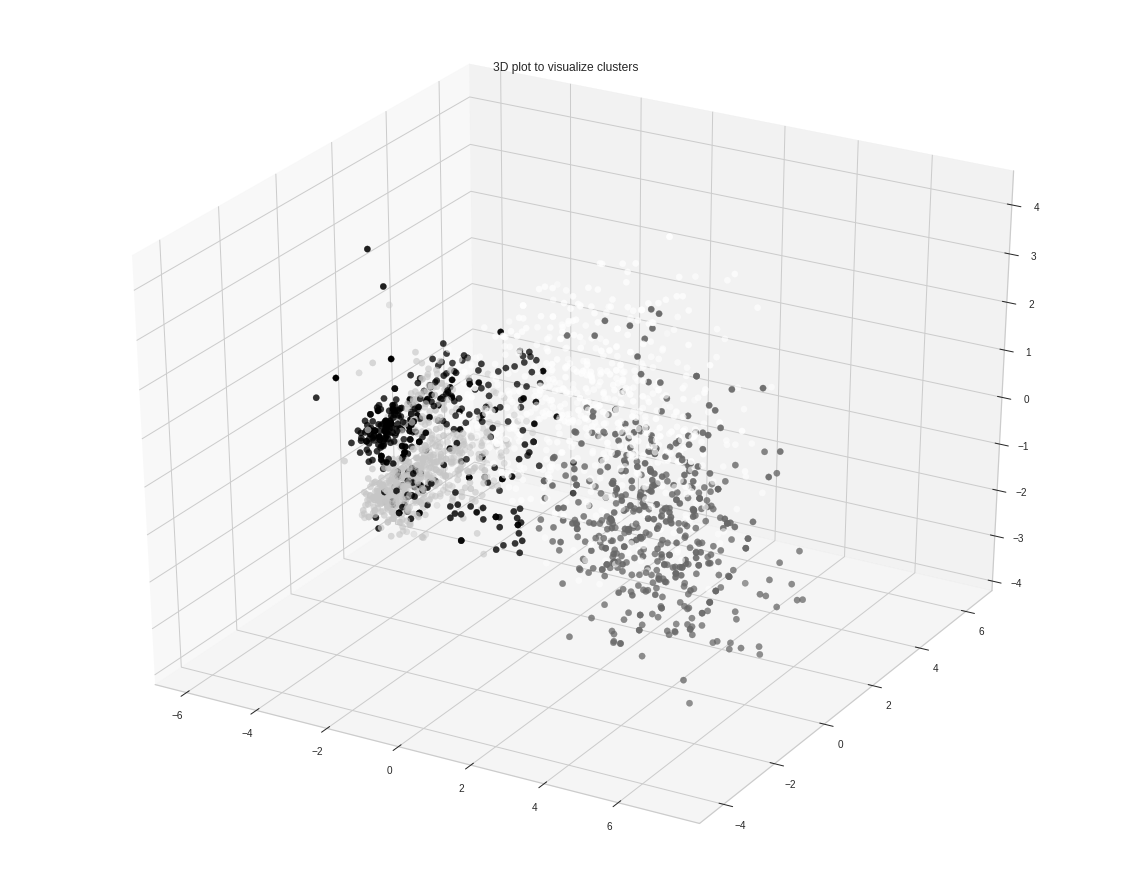

In [ ]:
fig = plt.figure(figsize=(8, 15))
ax = fig.add_subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y, z, s= 40, c= pca_df['Clusters'], marker = 'o' )
ax.set_title('3D plot to visualize clusters')
plt.show()

### Evaluating the Clustering Model

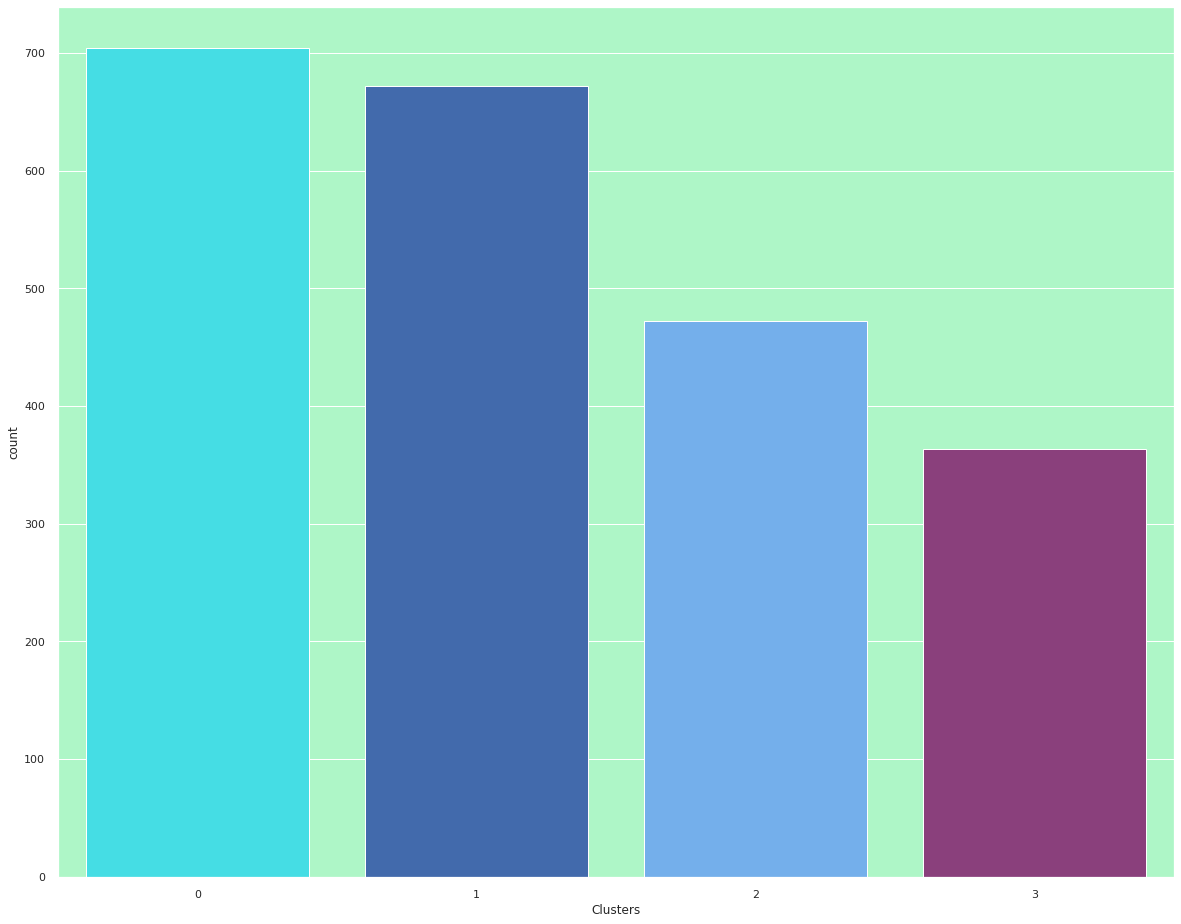

In [ ]:
#cluster distribution
plt.figure(figsize=(20, 16))
sns.set(rc={"axes.facecolor":"#AEF6C7","figure.facecolor":"#5B8266"})
palette = ['#2AF5FF', "#3066BE", '#60AFFF', '#963484']
sns.countplot(x= data['Clusters'], palette = palette)
plt.show()

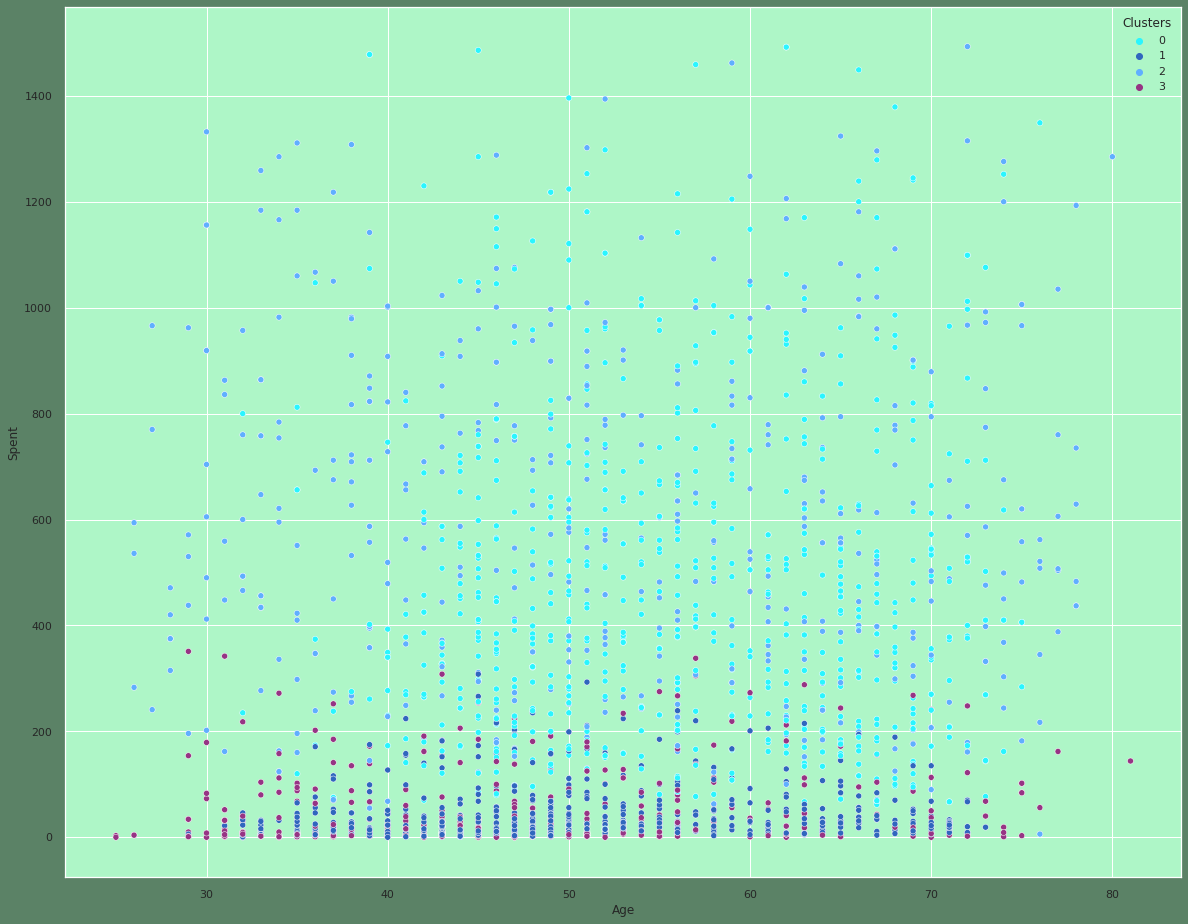

In [ ]:
plt.figure(figsize=(20, 16))
sns.set(rc={"axes.facecolor":"#AEF6C7","figure.facecolor":"#5B8266"})
sns.scatterplot(x = data['Age'], y = data['Spent'], hue= data['Clusters'], palette = palette)

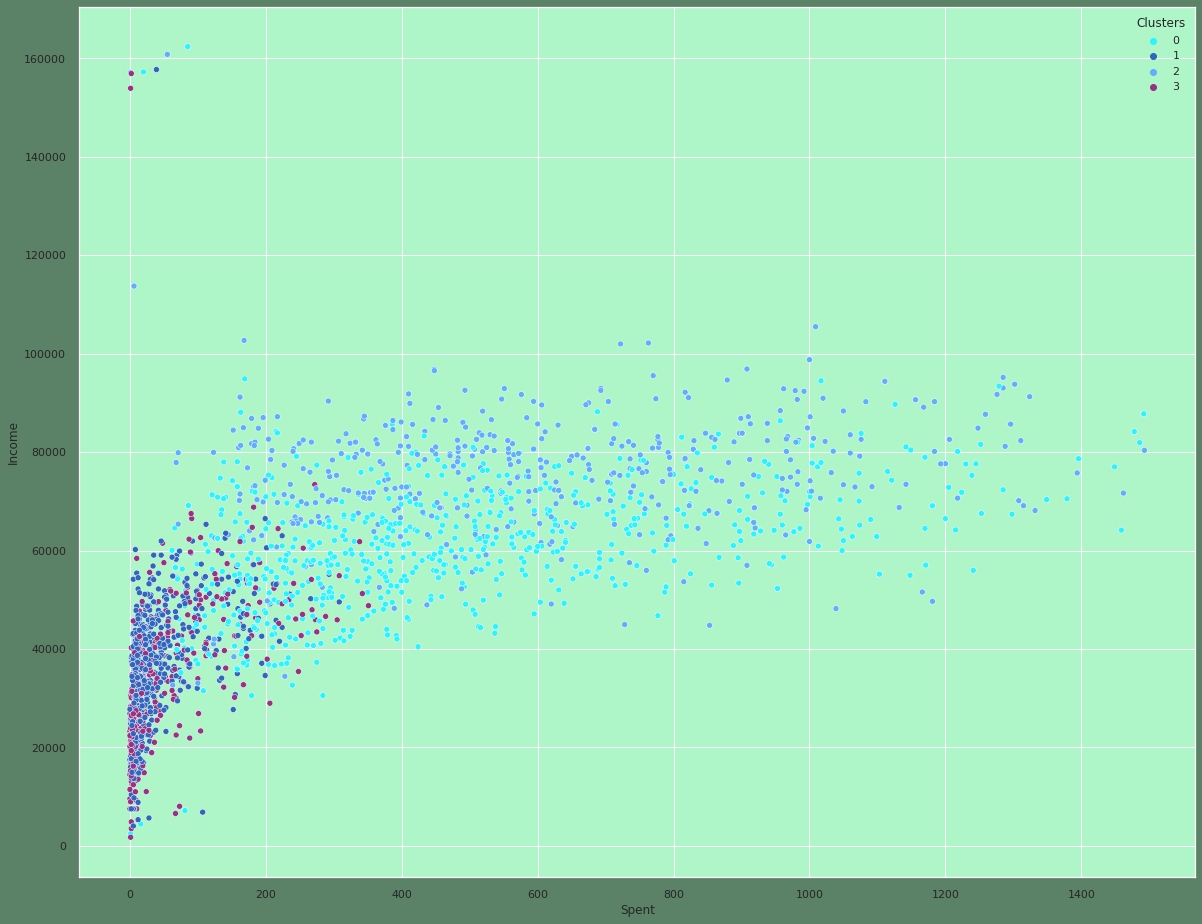

In [ ]:
plt.figure(figsize=(20, 16))
sns.set(rc={"axes.facecolor":"#AEF6C7","figure.facecolor":"#5B8266"})
sns.scatterplot(x = data['Spent'], y = data['Income'], hue= data['Clusters'], palette = palette)

#### Income vs spending plot shows a pattern

- group 0: high spending & average income
- group 1: high spending & high income
- group 2: low spending & low income
- group 3: high spending & low income

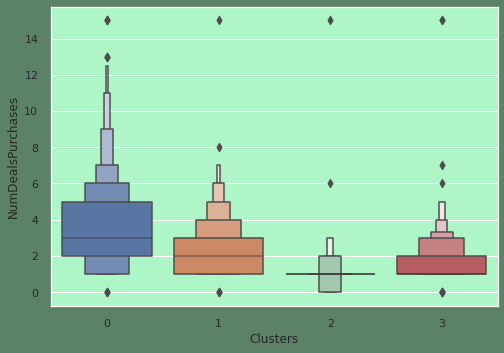

In [ ]:

sns.boxenplot(data= data, y= data['NumDealsPurchases'], x= data['Clusters'])

Deals have a overwhelming response to cluster 0 and 3. Cluster 2 doesn't seem to have been influenced with the deals. Cluster 1 has an average response to the Deals